### Problem Statement

**Overview** <br>
As a new member of a residential real estate firm, I've been tasked with building a model that can be used in-house to determine what features and model best predict housing prices and potentially build out the model to sell to other companies across the country. For the beta version of the model, I will use a dataset containing assessed values for individual residential properties sold in Ames, IA, from 2006 to 2010.

**Evaluation** <br>
To build my model, I will use train-test split, cross-validation, and grid searching for hyperparameters, exploratory data analysis, and correlation analysis of independent features. I will be using different supervised learning regression techniques, including Linear, Ridge, and Lasso, to build out my model and will be evaluating my model with R-squared score and Root Mean Squared Error.  

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import statsmodels.api as sm

from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error 
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import GridSearchCV

### Load in Data

Dataset contains assessed values for individual residential properties sold in Ames, IA from 2006 to 2010.

### Data Dictionary 
Data Dictionary (from the [AmesHousing.txt](http://jse.amstat.org/v19n3/decock/DataDocumentation.txt))


In [2]:
# Read in Datasets
df_train = pd.read_csv('./datasets/train.csv')
df_test = pd.read_csv('./datasets/test.csv')

In [3]:
# First 5 rows of train dataset
df_train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [4]:
# First 5 rows of test dataset
df_test.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,...,0,185,0,NaN,NaN,NaN,0,7,2009,WD


In [5]:
# Train Shape
df_train.shape

(2051, 81)

In [6]:
# Test Shape
df_test.shape

(878, 80)

In [7]:
# Seeing what column is in train that is not in test.
set(df_train) - set(df_test)

{'SalePrice'}

### Data Cleaning and Initial Check

In [8]:
# Value counts and datatypes for train
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS SubClass      2051 non-null   int64  
 3   MS Zoning        2051 non-null   object 
 4   Lot Frontage     1721 non-null   float64
 5   Lot Area         2051 non-null   int64  
 6   Street           2051 non-null   object 
 7   Alley            140 non-null    object 
 8   Lot Shape        2051 non-null   object 
 9   Land Contour     2051 non-null   object 
 10  Utilities        2051 non-null   object 
 11  Lot Config       2051 non-null   object 
 12  Land Slope       2051 non-null   object 
 13  Neighborhood     2051 non-null   object 
 14  Condition 1      2051 non-null   object 
 15  Condition 2      2051 non-null   object 
 16  Bldg Type        2051 non-null   object 
 17  House Style   

In [9]:
# Value counts and datatypes for test set
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878 entries, 0 to 877
Data columns (total 80 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               878 non-null    int64  
 1   PID              878 non-null    int64  
 2   MS SubClass      878 non-null    int64  
 3   MS Zoning        878 non-null    object 
 4   Lot Frontage     718 non-null    float64
 5   Lot Area         878 non-null    int64  
 6   Street           878 non-null    object 
 7   Alley            58 non-null     object 
 8   Lot Shape        878 non-null    object 
 9   Land Contour     878 non-null    object 
 10  Utilities        878 non-null    object 
 11  Lot Config       878 non-null    object 
 12  Land Slope       878 non-null    object 
 13  Neighborhood     878 non-null    object 
 14  Condition 1      878 non-null    object 
 15  Condition 2      878 non-null    object 
 16  Bldg Type        878 non-null    object 
 17  House Style     

In [10]:
# Setting Id column to new index for both train and test datasets
df_train.set_index('Id', inplace = True)
df_test.set_index('Id', inplace = True)

In [11]:
# Checking how many missing values are in train set.
df_train.isnull().sum().sort_values(ascending = False)[:30]

Pool QC           2042
Misc Feature      1986
Alley             1911
Fence             1651
Fireplace Qu      1000
Lot Frontage       330
Garage Finish      114
Garage Qual        114
Garage Yr Blt      114
Garage Cond        114
Garage Type        113
Bsmt Exposure       58
BsmtFin Type 2      56
Bsmt Cond           55
Bsmt Qual           55
BsmtFin Type 1      55
Mas Vnr Area        22
Mas Vnr Type        22
Bsmt Full Bath       2
Bsmt Half Bath       2
Garage Area          1
Garage Cars          1
Total Bsmt SF        1
Bsmt Unf SF          1
BsmtFin SF 2         1
BsmtFin SF 1         1
Full Bath            0
Half Bath            0
Bedroom AbvGr        0
Kitchen AbvGr        0
dtype: int64

In [12]:
# Checking how many missing values are in test set.
df_test.isnull().sum().sort_values(ascending = False)[:25]

Pool QC           874
Misc Feature      837
Alley             820
Fence             706
Fireplace Qu      422
Lot Frontage      160
Garage Yr Blt      45
Garage Finish      45
Garage Qual        45
Garage Cond        45
Garage Type        44
BsmtFin Type 1     25
Bsmt Qual          25
Bsmt Cond          25
Bsmt Exposure      25
BsmtFin Type 2     25
Electrical          1
Mas Vnr Type        1
Mas Vnr Area        1
Kitchen Qual        0
Functional          0
Kitchen AbvGr       0
Bedroom AbvGr       0
Half Bath           0
Full Bath           0
dtype: int64

### Null Value Evaluation and Cleanup

In [13]:
# Pool Evaluation 
# Pool Area & Quality Values
print('Pool area values in training set: ' + str(df_train['Pool Area'].value_counts(dropna = False, normalize = True).unique))
print('Pool quality values in training set: ' + str(df_train['Pool QC'].value_counts(dropna = False, normalize = True).unique))
print('Pool area values in testing set: ' + str(df_test['Pool Area'].value_counts(dropna = False, normalize = True).unique))
print('Pool quality values in testing set: ' + str(df_test['Pool QC'].value_counts(dropna = False, normalize = True).unique))

Pool area values in training set: <bound method Series.unique of 0      0.995612
228    0.000488
368    0.000488
480    0.000488
576    0.000488
648    0.000488
738    0.000488
800    0.000488
519    0.000488
561    0.000488
Name: Pool Area, dtype: float64>
Pool quality values in training set: <bound method Series.unique of NaN    0.995612
Gd     0.001950
Fa     0.000975
TA     0.000975
Ex     0.000488
Name: Pool QC, dtype: float64>
Pool area values in testing set: <bound method Series.unique of 0      0.995444
144    0.001139
444    0.001139
512    0.001139
555    0.001139
Name: Pool Area, dtype: float64>
Pool quality values in testing set: <bound method Series.unique of NaN    0.995444
Ex     0.003417
TA     0.001139
Name: Pool QC, dtype: float64>


In [14]:
# Dropping Pool columns due to high NaN values
df_train.drop(columns = ['Pool Area','Pool QC'], inplace = True)
df_test.drop(columns = ['Pool Area','Pool QC'], inplace = True)

In [15]:
# Misc Feature Evaluation 
# Misc Feature Value Counts
print('Misc feature value counts in training set: ' + str(df_train['Misc Val'].value_counts(dropna = False, normalize = True).unique))
print('Misc feature value counts in testing set: ' + str(df_test['Misc Val'].value_counts(dropna = False, normalize = True).unique))

Misc feature value counts in training set: <bound method Series.unique of 0        0.968308
400      0.005851
500      0.003901
600      0.002925
2000     0.002438
450      0.002438
700      0.001950
4500     0.000975
2500     0.000975
3000     0.000975
1200     0.000975
6500     0.000488
900      0.000488
1500     0.000488
455      0.000488
1300     0.000488
1150     0.000488
650      0.000488
800      0.000488
54       0.000488
17000    0.000488
480      0.000488
460      0.000488
300      0.000488
12500    0.000488
8300     0.000488
80       0.000488
3500     0.000488
Name: Misc Val, dtype: float64>
Misc feature value counts in testing set: <bound method Series.unique of 0        0.956720
400      0.006834
500      0.005695
450      0.004556
700      0.003417
2000     0.002278
650      0.002278
1500     0.002278
600      0.002278
750      0.001139
620      0.001139
560      0.001139
1512     0.001139
490      0.001139
15500    0.001139
480      0.001139
420      0.001139
1400     0.

In [16]:
# Dropping Misc Feature columns due to high NaN values
df_train.drop(columns = ['Misc Feature','Misc Val'], inplace = True)
df_test.drop(columns = ['Misc Feature', 'Misc Val'], inplace = True)

In [17]:
# Alley Evaluation 
# Alley Value Counts
print('Alley values in training set: ' + str(df_train['Alley'].value_counts(dropna = False, normalize = True).unique))
print('Alley values in testing set: ' + str(df_test['Alley'].value_counts(dropna = False, normalize = True).unique))

Alley values in training set: <bound method Series.unique of NaN     0.931741
Grvl    0.041443
Pave    0.026816
Name: Alley, dtype: float64>
Alley values in testing set: <bound method Series.unique of NaN     0.933941
Grvl    0.039863
Pave    0.026196
Name: Alley, dtype: float64>


In [18]:
# Dropping Alley column due to high NaN values
df_train.drop(columns = ['Alley'], inplace = True)
df_test.drop(columns = ['Alley'], inplace = True)

In [19]:
# Fence Evaluation 
# Evaluating Fence Value Counts
print('Fence value counts in training set: ' + str(df_train['Fence'].value_counts(dropna = False, normalize = True).unique))
print('Fence value counts in testing set: ' + str(df_test['Fence'].value_counts(dropna = False, normalize = True).unique))

Fence value counts in training set: <bound method Series.unique of NaN      0.804973
MnPrv    0.110678
GdPrv    0.040468
GdWo     0.039005
MnWw     0.004876
Name: Fence, dtype: float64>
Fence value counts in testing set: <bound method Series.unique of NaN      0.804100
MnPrv    0.117312
GdPrv    0.039863
GdWo     0.036446
MnWw     0.002278
Name: Fence, dtype: float64>


In [20]:
# Dropping Fence column due to high NaN values
df_train.drop(columns = ['Fence'], inplace = True)
df_test.drop(columns = ['Fence'], inplace = True)

In [21]:
# Fireplace Evalation
# Evaluating Fireplace Value Counts
print('Fireplace value counts in training set: ' + str(df_train['Fireplace Qu'].value_counts(dropna = False, normalize = True).unique))
print('Fireplace value counts in testing set: ' + str(df_test['Fireplace Qu'].value_counts(dropna = False, normalize = True).unique))

Fireplace value counts in training set: <bound method Series.unique of NaN    0.487567
Gd     0.254998
TA     0.198440
Fa     0.028766
Po     0.015115
Ex     0.015115
Name: Fireplace Qu, dtype: float64>
Fireplace value counts in testing set: <bound method Series.unique of NaN    0.480638
Gd     0.250569
TA     0.219818
Fa     0.018223
Po     0.017084
Ex     0.013667
Name: Fireplace Qu, dtype: float64>


In [22]:
# Replacing NaN Values with 'No Fireplace' for Fireplace Qual
df_train['Fireplace Qu'] = df_train['Fireplace Qu'].replace(np.nan, 'No Fireplace')
df_test['Fireplace Qu'] = df_test['Fireplace Qu'].replace(np.nan, 'No Fireplace')

In [23]:
# Replacing NaN Values with 'No Garage' for Garage Columns 
df_train['Garage Finish'] = df_train['Garage Finish'].replace(np.nan, 'No Garage')
df_test['Garage Finish'] = df_test['Garage Finish'].replace(np.nan, 'No Garage')

df_train['Garage Qual'] = df_train['Garage Qual'].replace(np.nan, 'No Garage')
df_test['Garage Qual'] = df_test['Garage Qual'].replace(np.nan, 'No Garage')

df_train['Garage Cond'] = df_train['Garage Cond'].replace(np.nan, 'No Garage')
df_test['Garage Cond'] = df_test['Garage Cond'].replace(np.nan, 'No Garage')

df_train['Garage Type'] = df_train['Garage Type'].replace(np.nan, 'No Garage')
df_test['Garage Type'] = df_test['Garage Type'].replace(np.nan, 'No Garage')

In [24]:
# Replacing values with 0 that meet null conditions and garage = 'No Garage'
# Training Set
df_train.loc[(df_train['Garage Yr Blt'].isnull()) & (df_train['Garage Type'] == 'No Garage'),['Garage Yr Blt']] = 0
df_train.loc[(df_train['Garage Cars'].isnull()) & (df_train['Garage Type'] == 'No Garage'),['Garage Cars']] = 0
df_train.loc[(df_train['Garage Area'].isnull()) & (df_train['Garage Type'] == 'No Garage'),['Garage Area']] = 0

# Testing Set
df_test.loc[(df_test['Garage Yr Blt'].isnull()) & (df_test['Garage Type'] == 'No Garage'), ['Garage Yr Blt']] = 0
df_test.loc[(df_test['Garage Cars'].isnull()) & (df_test['Garage Type'] == 'No Garage'), ['Garage Cars']] = 0
df_test.loc[(df_test['Garage Area'].isnull()) & (df_test['Garage Type'] == 'No Garage'), ['Garage Area']] = 0

# Used conditional replace method from:
# https://www.kite.com/python/answers/how-to-replace-values-in-a-pandas-dataframe-that-satisfy-a-condition-in-python

In [25]:
# Replacing NaN Values with 'No Basement' for Basement Columns 
# Training Set
df_train['Bsmt Qual'] = df_train['Bsmt Qual'].replace(np.nan, 'No Basement')
df_train['Bsmt Cond'] = df_train['Bsmt Cond'].replace(np.nan, 'No Basement')
df_train['Bsmt Exposure'] = df_train['Bsmt Exposure'].replace(np.nan, 'No Basement')
df_train['BsmtFin Type 1'] = df_train['BsmtFin Type 1'].replace(np.nan, 'No Basement')
df_train['BsmtFin Type 2'] = df_train['BsmtFin Type 2'].replace(np.nan, 'No Basement')

# Testing Set
df_test['Bsmt Qual'] = df_test['Bsmt Qual'].replace(np.nan, 'No Basement')
df_test['Bsmt Cond'] = df_test['Bsmt Cond'].replace(np.nan, 'No Basement')
df_test['Bsmt Exposure'] = df_test['Bsmt Exposure'].replace(np.nan, 'No Basement')
df_test['BsmtFin Type 1'] = df_test['BsmtFin Type 1'].replace(np.nan, 'No Basement')
df_test['BsmtFin Type 2'] = df_test['BsmtFin Type 2'].replace(np.nan, 'No Basement')

In [26]:
# Replacing values with 0 that meet null conditions and basement = 'No Basement'
# Training Set
df_train.loc[(df_train['Bsmt Full Bath'].isnull()) & (df_train['Bsmt Qual'] == 'No Basement'), ['Bsmt Full Bath']] = 0
df_train.loc[(df_train['Bsmt Half Bath'].isnull()) & (df_train['Bsmt Qual'] == 'No Basement'), ['Bsmt Half Bath']] = 0
df_train.loc[(df_train['Total Bsmt SF'].isnull()) & (df_train['Bsmt Qual'] == 'No Basement'), ['Total Bsmt SF']] = 0
df_train.loc[(df_train['Bsmt Unf SF'].isnull()) & (df_train['Bsmt Qual'] == 'No Basement'), ['Bsmt Unf SF']] = 0
df_train.loc[(df_train['BsmtFin SF 1'].isnull()) & (df_train['Bsmt Qual'] == 'No Basement'), ['BsmtFin SF 1']] = 0
df_train.loc[(df_train['BsmtFin SF 2'].isnull()) & (df_train['Bsmt Qual'] == 'No Basement'), ['BsmtFin SF 2']] = 0

# Testing Set
df_test.loc[(df_test['Bsmt Full Bath'].isnull()) & (df_test['Bsmt Qual'] == 'No Basement'), ['Bsmt Full Bath']] = 0
df_test.loc[(df_test['Bsmt Half Bath'].isnull()) & (df_test['Bsmt Qual'] == 'No Basement'), ['Bsmt Half Bath']] = 0
df_test.loc[(df_test['Total Bsmt SF'].isnull()) & (df_test['Bsmt Qual'] == 'No Basement'), ['Total Bsmt SF']] = 0
df_test.loc[(df_test['Bsmt Unf SF'].isnull()) & (df_test['Bsmt Qual'] == 'No Basement'), ['Bsmt Unf SF']] = 0
df_test.loc[(df_test['BsmtFin SF 1'].isnull()) & (df_test['Bsmt Qual'] == 'No Basement'), ['BsmtFin SF 1']] = 0
df_test.loc[(df_test['BsmtFin SF 2'].isnull()) & (df_test['Bsmt Qual'] == 'No Basement'), ['BsmtFin SF 2']] = 0

In [27]:
# Replacing NaN Values with 'None' for Mas Vnr Type
df_train['Mas Vnr Type'] = df_train['Mas Vnr Type'].replace(np.nan, 'None')
df_test['Mas Vnr Type'] = df_test['Mas Vnr Type'].replace(np.nan, 'None')

In [28]:
# Replacing values with 0 that meet null conditions and Mas Vnr Type = 'None'
df_train.loc[(df_train['Mas Vnr Area'].isnull()) & (df_train['Mas Vnr Type'] == 'None'), ['Mas Vnr Area']] = 0
df_test.loc[(df_test['Mas Vnr Area'].isnull()) & (df_test['Mas Vnr Type'] == 'None'), ['Mas Vnr Area']] = 0

In [29]:
# Replacing NaN Values with Mean Value for Lot Frontage
df_train['Lot Frontage'] = df_train['Lot Frontage'].replace(np.nan, df_train['Lot Frontage'].mean())
df_test['Lot Frontage'] = df_test['Lot Frontage'].replace(np.nan, df_train['Lot Frontage'].mean())

In [30]:
# Replacing NaN Values with 0 for rows with no garage
df_train.loc[(df_train['Garage Area'].isnull()) & (df_train['Garage Qual'] == 'No Garage'), ['Garage Area']] = 0
df_test.loc[(df_test['Garage Area'].isnull()) & (df_test['Garage Qual'] == 'No Garage'), ['Garage Area']] = 0

# Replacing NaN values with mean value of Garage Area for rows with garage
df_train['Garage Area'] = df_train['Garage Area'].replace(np.nan, df_train['Garage Area'].mean())
df_test['Garage Area'] = df_test['Garage Area'].replace(np.nan, df_train['Garage Area'].mean())

In [31]:
# Replacing NaN Values with 0 for rows with no garage
df_train.loc[(df_train['Garage Cars'].isnull()) & (df_train['Garage Qual'] == 'No Garage'), ['Garage Cars']] = 0
df_test.loc[(df_test['Garage Cars'].isnull()) & (df_test['Garage Qual'] == 'No Garage'), ['Garage Cars']] = 0

train_cars_mode = df_train['Garage Cars'].mode()
test_cars_mode = df_test['Garage Cars'].mode()

# Replacing NaN values with mode value of Garage Cars for rows with garage
df_train['Garage Cars'].fillna(train_cars_mode)
df_test['Garage Cars'].fillna(test_cars_mode)

Id
2658    1
2718    2
2414    2
1989    2
625     2
       ..
1662    2
1234    2
1373    1
1672    2
1939    1
Name: Garage Cars, Length: 878, dtype: int64

In [32]:
# Replacing NaN Values with 0 for rows with no garage
df_train.loc[(df_train['Garage Yr Blt'].isnull()) & (df_train['Garage Qual'] == 'No Garage'), ['Garage Yr Blt']] = 0
df_test.loc[(df_test['Garage Yr Blt'].isnull()) & (df_test['Garage Qual'] == 'No Garage'), ['Garage Yr Blt']] = 0

train_garageyr_median = df_train['Garage Yr Blt'].median()
test_garageyr_median = df_test['Garage Yr Blt'].median()

# Replacing NaN values with median value of Garage Yr Built for rows with garage
df_train['Garage Yr Blt'] = df_train['Garage Yr Blt'].replace(np.nan, train_garageyr_median)
df_test['Garage Yr Blt'] = df_test['Garage Yr Blt'].replace(np.nan, test_garageyr_median)

In [33]:
# Filling Null for Electrical in Test
df_test['Electrical'].mode()
df_test['Electrical'] = df_test['Electrical'].fillna('SBrkr')

In [34]:
# Checking Null Values in Training
df_train.isnull().sum().sort_values(ascending = False).head()

PID              0
Fireplaces       0
TotRms AbvGrd    0
Kitchen Qual     0
Kitchen AbvGr    0
dtype: int64

In [35]:
#Checking Null Values in Testing
df_test.isnull().sum().sort_values(ascending = False).head()

PID              0
Total Bsmt SF    0
TotRms AbvGrd    0
Kitchen Qual     0
Kitchen AbvGr    0
dtype: int64

### Initial EDA

In [36]:
df_train.select_dtypes('object').columns

Index(['MS Zoning', 'Street', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl',
       'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating', 'Heating QC',
       'Central Air', 'Electrical', 'Kitchen Qual', 'Functional',
       'Fireplace Qu', 'Garage Type', 'Garage Finish', 'Garage Qual',
       'Garage Cond', 'Paved Drive', 'Sale Type'],
      dtype='object')

In [37]:
# Evaluating value names and counts for object datatype columns
print(df_train['MS Zoning'].value_counts(normalize = True))
print('----------------------------------')
print(df_train['Street'].value_counts(normalize = True))
print('----------------------------------')
print(df_train['Lot Shape'].value_counts(normalize = True))
print('----------------------------------')
print(df_train['Land Contour'].value_counts(normalize = True))
print('----------------------------------')
print(df_train['Utilities'].value_counts(normalize = True))
print('----------------------------------')
print(df_train['Lot Config'].value_counts(normalize = True))
print('----------------------------------')
print(df_train['Land Slope'].value_counts(normalize = True))
print('----------------------------------')
print(df_train['Neighborhood'].value_counts(normalize = True))
print('----------------------------------')
print(df_train['Condition 1'].value_counts(normalize = True))
print('----------------------------------')
print(df_train['Condition 2'].value_counts(normalize = True))
print('----------------------------------')
print(df_train['Bldg Type'].value_counts(normalize = True))
print('----------------------------------')
print(df_train['House Style'].value_counts(normalize = True))
print('----------------------------------')
print(df_train['Roof Style'].value_counts(normalize = True))
print('----------------------------------')
print(df_train['Roof Matl'].value_counts(normalize = True))
print('----------------------------------')
print(df_train['Exterior 1st'].value_counts(normalize = True))
print('----------------------------------')
print(df_train['Exterior 2nd'].value_counts(normalize = True))
print('----------------------------------')
print(df_train['Mas Vnr Type'].value_counts(normalize = True))
print('----------------------------------')
print(df_train['Exter Qual'].value_counts(normalize = True))
print('----------------------------------')
print(df_train['Exter Cond'].value_counts(normalize = True))
print('----------------------------------')
print(df_train['Foundation'].value_counts(normalize = True))
print('----------------------------------')
print(df_train['Bsmt Qual'].value_counts(normalize = True))
print('----------------------------------')
print(df_train['Bsmt Cond'].value_counts(normalize = True))
print('----------------------------------')
print(df_train['Bsmt Exposure'].value_counts(normalize = True))
print('----------------------------------')
print(df_train['BsmtFin Type 1'].value_counts(normalize = True))
print('----------------------------------')
print(df_train['BsmtFin Type 2'].value_counts(normalize = True))
print('----------------------------------')
print(df_train['Heating'].value_counts(normalize = True))
print('----------------------------------')
print(df_train['Heating QC'].value_counts(normalize = True))
print('----------------------------------')
print(df_train['Central Air'].value_counts(normalize = True))
print('----------------------------------')
print(df_train['Electrical'].value_counts(normalize = True))
print('----------------------------------')
print(df_train['Kitchen Qual'].value_counts(normalize = True))
print('----------------------------------')
print(df_train['Garage Type'].value_counts(normalize = True))
print('----------------------------------')
print(df_train['Garage Finish'].value_counts(normalize = True))
print('----------------------------------')
print(df_train['Garage Qual'].value_counts(normalize = True))
print('----------------------------------')
print(df_train['Garage Cond'].value_counts(normalize = True))
print('----------------------------------')
print(df_train['Paved Drive'].value_counts(normalize = True))
print('----------------------------------')
print(df_train['Functional'].value_counts(normalize = True))
print('----------------------------------')
print(df_train['Fireplace Qu'].value_counts(normalize = True))
print('----------------------------------')
print(df_train['Sale Type'].value_counts(normalize = True))

RL         0.779132
RM         0.154071
FV         0.049244
C (all)    0.009264
RH         0.006826
A (agr)    0.000975
I (all)    0.000488
Name: MS Zoning, dtype: float64
----------------------------------
Pave    0.996587
Grvl    0.003413
Name: Street, dtype: float64
----------------------------------
Reg    0.631399
IR1    0.337396
IR2    0.026816
IR3    0.004388
Name: Lot Shape, dtype: float64
----------------------------------
Lvl    0.898586
HLS    0.041443
Bnk    0.039005
Low    0.020965
Name: Land Contour, dtype: float64
----------------------------------
AllPub    0.999025
NoSeWa    0.000488
NoSewr    0.000488
Name: Utilities, dtype: float64
----------------------------------
Inside     0.732813
Corner     0.169673
CulDSac    0.063871
FR2        0.029254
FR3        0.004388
Name: Lot Config, dtype: float64
----------------------------------
Gtl    0.952218
Mod    0.042906
Sev    0.004876
Name: Land Slope, dtype: float64
----------------------------------
NAmes      0.151146
Co

Will one-hot encode or ordinal encode some of these

In [38]:
# Summary statistics for Training
df_train.describe()

,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,...,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Mo Sold,Yr Sold,SalePrice
count,2.051000e+03,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,...,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000
mean,7.135900e+08,57.008776,69.055200,10065.208191,6.112140,5.562165,1971.708922,1984.190151,98.626524,442.084837,...,1.775719,473.440761,93.833740,47.556802,22.571916,2.591419,16.511458,6.219893,2007.775719,181469.701609
std,1.886918e+08,42.824223,21.306357,6742.488909,1.426271,1.104497,30.177889,21.036250,174.324690,461.195041,...,0.765357,216.135102,128.549416,66.747241,59.845110,25.229615,57.374204,2.744736,1.312014,79258.659352
min,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,5.284581e+08,20.000000,60.000000,7500.000000,5.000000,5.000000,1953.500000,1964.500000,0.000000,0.000000,...,1.000000,319.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129825.000000
50%,5.354532e+08,50.000000,69.055200,9430.000000,6.000000,5.000000,1974.000000,1993.000000,0.000000,368.000000,...,2.000000,480.000000,0.000000,27.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,162500.000000
75%,9.071801e+08,70.000000,78.000000,11513.500000,7.000000,6.000000,2001.000000,2004.000000,159.000000,733.500000,...,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,9.241520e+08,190.000000,313.000000,159000.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,5.000000,1418.000000,1424.000000,547.000000,432.000000,508.000000,490.000000,12.000000,2010.000000,611657.000000


Summary Statistic Takeaways:
- Lot Area looks like it has a wide range of values with a high std. There is a low minimum and high maximum for Lot Area as well.
- It looks like most houses are sold between April - June and between 2007 - 2008. 
- There appears to be high variability of values for many of the SF features, as well as SalePrice. 

In [39]:
# Summary statistics for Testing
df_test.describe()

,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,...,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Mo Sold,Yr Sold
count,8.780000e+02,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,...,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000
mean,7.162867e+08,58.268793,69.456529,10307.033030,6.050114,5.566059,1970.492027,1984.417995,106.115034,441.328018,...,1875.445330,1.742597,470.362187,93.430524,47.070615,24.064920,2.597950,14.830296,6.202733,2007.825740
std,1.889103e+08,42.235407,21.280006,10002.674602,1.369065,1.128903,30.395895,20.450725,187.086530,438.457329,...,436.866917,0.750391,212.734075,121.181702,68.180939,73.249463,24.962482,53.003794,2.642498,1.327861
min,5.263021e+08,20.000000,21.000000,1477.000000,2.000000,1.000000,1880.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,5.284841e+08,20.000000,60.000000,7297.250000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,1957.000000,1.000000,322.500000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000
50%,5.354542e+08,50.000000,69.055200,9446.000000,6.000000,5.000000,1972.000000,1992.000000,0.000000,373.000000,...,1976.500000,2.000000,473.000000,0.000000,27.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,9.071904e+08,70.000000,78.000000,11589.000000,7.000000,6.000000,1999.750000,2003.000000,171.750000,734.750000,...,2000.000000,2.000000,576.000000,170.750000,69.750000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,1.007100e+09,190.000000,182.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1378.000000,2288.000000,...,2010.000000,4.000000,1488.000000,690.000000,742.000000,1012.000000,360.000000,576.000000,12.000000,2010.000000


Summary Statistic Takeaways:
- Lot Area looks like it has a wide range of values with a higher std. There is a low minimum and high maximum for Lot Area as well.
- It looks like most houses are sold between May - June and between 2007 - 2008. 
- There appears to be high variability of values for many of the SF features.

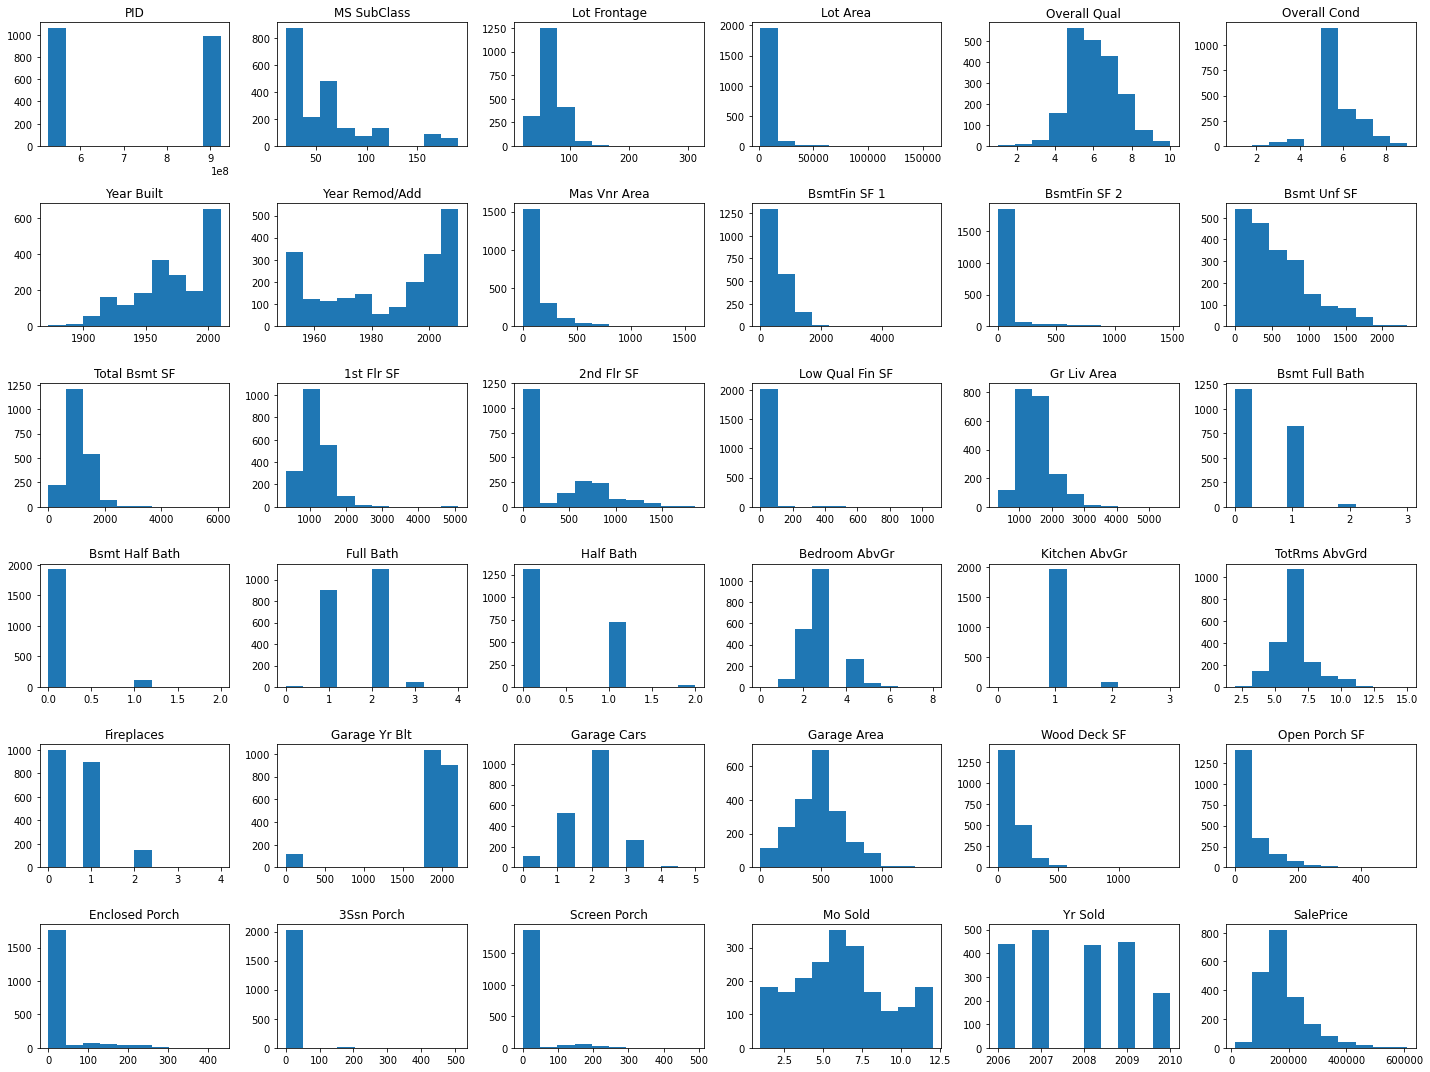

In [40]:
# Distributions of numerical features
df_train.hist(figsize = (20,15), grid = False);
plt.tight_layout();

Distributions are skewed for these numeric features. Garage Cars, Overall Qual, Garage Area, Gr Liv Area, and TotRms AbvGrd look closer to normally distributed than the rest. 

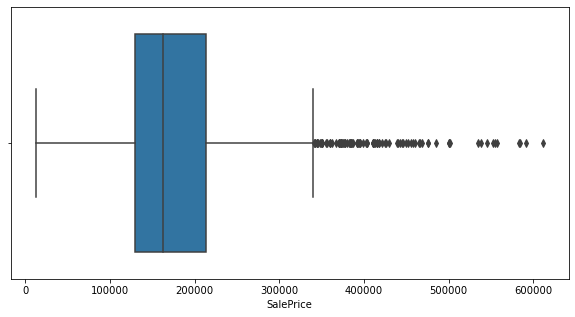

In [41]:
# Boxplot of Target Variable: Sale Price
plt.figure(figsize = (10,5))
sns.boxplot(x = df_train['SalePrice']);

There are a few outliers in Sale Price. However, I tried removing these and it wound up making my model perform worse with higher error, so leaving these as is.

In [42]:
df_train.corr().sort_values(by = 'SalePrice', ascending = False).head()

,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,...,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Mo Sold,Yr Sold,SalePrice
SalePrice,-0.255052,-0.087335,0.325850,0.296566,0.800207,-0.097019,0.571849,0.550370,0.503579,0.423856,...,0.647781,0.649897,0.326490,0.333476,-0.135656,0.048732,0.134581,0.032735,-0.015203,1.000000
Overall Qual,-0.265863,0.035763,0.182459,0.105824,1.000000,-0.082770,0.602964,0.584654,0.430041,0.279223,...,0.587447,0.563904,0.257081,0.308855,-0.154554,0.031938,0.048752,0.019242,-0.011578,0.800207
Gr Liv Area,-0.112936,0.068210,0.350425,0.327427,0.566701,-0.109804,0.258838,0.322407,0.383875,0.215735,...,0.485166,0.489620,0.270239,0.345008,-0.007777,0.024504,0.101926,0.049644,-0.015891,0.697038
Garage Area,-0.201717,-0.108423,0.339421,0.263145,0.563904,-0.138174,0.488023,0.397731,0.380563,0.331252,...,0.893442,1.000000,0.244536,0.247664,-0.115331,0.043976,0.071290,0.011203,-0.002952,0.649897
Garage Cars,-0.229187,-0.049426,0.281038,0.214839,0.587447,-0.168733,0.543313,0.440365,0.356690,0.260421,...,1.000000,0.893442,0.239675,0.215861,-0.142668,0.028472,0.053836,0.022095,-0.009312,0.647781


Strong Correlation with SalePrice: 
- Overall Quall: 0.80
- Year Built: 0.57
- Year Remod/Add : 0.55
- Mas Vnr Area: 0.50
- Total Bsmt SF: 0.63
- 1st Flr SF: 0.62
- Gr Liv Area: 0.70
- Full Bath: 0.54
- Garage Cars: 0.65
- Garage Area: 0.65

Will be adding these to independent features for modeling

### Feature Engineering

In [43]:
# Creating new dictionary for fireplace quality column (1: No Fireplace, 2: Poor, 3: Fair, 4: Average, 5: Good, 6: Excellent)
fireplace_q_dict = {
    'Ex': 6,
    'Gd': 5,
    'TA': 4,
    'Fa': 3,
    'Po': 2,
    'No Fireplace': 1
}

In [44]:
# Mapping fireplace quality column values to fireplace dictionary
df_train['Fireplace Qu'] = df_train['Fireplace Qu'].map(fireplace_q_dict)
df_test['Fireplace Qu'] = df_test['Fireplace Qu'].map(fireplace_q_dict)

In [45]:
# Checking to ensure the values updated
print(df_train['Fireplace Qu'].value_counts().unique)
print(df_test['Fireplace Qu'].value_counts().unique)

<bound method Series.unique of 1    1000
5     523
4     407
3      59
2      31
6      31
Name: Fireplace Qu, dtype: int64>
<bound method Series.unique of 1    422
5    220
4    193
3     16
2     15
6     12
Name: Fireplace Qu, dtype: int64>


In [46]:
# Creating new dictionary for kitchen quality column (1: Poor, 2: Fair, 3: Typical/Average, 4: Good, 5: Excellent)
kitchen_q_dict = {
    'Ex': 5,
    'Gd': 4,
    'TA': 3,
    'Fa': 2,
    'Po': 1,
}

In [47]:
# Mapping kitchen quality column values to kitchen dictionary
df_train['Kitchen Qual'] = df_train['Kitchen Qual'].map(kitchen_q_dict)
df_test['Kitchen Qual'] = df_test['Kitchen Qual'].map(kitchen_q_dict)

In [48]:
# Checking to ensure the values updated
print(df_train['Kitchen Qual'].value_counts().unique)
print(df_test['Kitchen Qual'].value_counts().unique)

<bound method Series.unique of 3    1047
4     806
5     151
2      47
Name: Kitchen Qual, dtype: int64>
<bound method Series.unique of 3    447
4    354
5     53
2     23
1      1
Name: Kitchen Qual, dtype: int64>


In [49]:
# Creating new dictionary for basementfin type 1 column (1: No Basement, 2: Unfinished, 3: Low Quality, 4: Average Rec Room, 5: Below Average Living Quarters, 6: Average Living Quarters, 7: Good Living Quarters)
bsmt_dict = {
    'GLQ': 7,
    'ALQ': 6,
    'BLQ': 5,
    'Rec': 4,
    'LwQ': 3,
    'Unf': 2,
    'No Basement': 1,
}

In [50]:
# Mapping BasementFin Type 1  column values to basementfin type 1 dictionary
df_train['BsmtFin Type 1'] = df_train['BsmtFin Type 1'].map(bsmt_dict)
df_test['BsmtFin Type 1'] = df_test['BsmtFin Type 1'].map(bsmt_dict)

In [51]:
# Checking to ensure the values updated
print(df_train['BsmtFin Type 1'].value_counts().unique)
print(df_test['BsmtFin Type 1'].value_counts().unique)

<bound method Series.unique of 7    615
2    603
6    293
5    200
4    183
3    102
1     55
Name: BsmtFin Type 1, dtype: int64>
<bound method Series.unique of 2    248
7    243
6    136
4    105
5     69
3     52
1     25
Name: BsmtFin Type 1, dtype: int64>


In [52]:
# Creating new dictionary for Paved Drive column (1: Dirt/Gravel, 2: Partial Pavement, 3: Paved)
driveway_dict = {
    'Y': 3,
    'P': 2,
    'N': 1,
}

In [53]:
# Mapping Paved Drive  column values to driveway dictionary
df_train['Paved Drive'] = df_train['Paved Drive'].map(driveway_dict)
df_test['Paved Drive'] = df_test['Paved Drive'].map(driveway_dict)

In [54]:
# Checking to ensure the values updated
print(df_train['Paved Drive'].value_counts().unique)
print(df_test['Paved Drive'].value_counts().unique)

<bound method Series.unique of 3    1861
1     151
2      39
Name: Paved Drive, dtype: int64>
<bound method Series.unique of 3    790
1     65
2     23
Name: Paved Drive, dtype: int64>


In [55]:
# One-Hot Encoding Central Air (1 for Yes, and 0 for No)
df_train['Central Air'] = [1 if i == 'Y' else 0 for i in df_train['Central Air']]
df_test['Central Air'] = [1 if i == 'Y' else 0 for i in df_test['Central Air']]

In [56]:
# One-Hot Encoding Garage Type (Garage Location) (1 if there is a garage and 0 if there is no garage)
df_train['Garage Type'] = [0 if i == 'No Garage' else 1 for i in df_train['Garage Type']]
df_test['Garage Type'] = [0 if i == 'No Garage' else 1 for i in df_test['Garage Type']]

In [57]:
# Updating Garage name
df_train.rename(columns = {'Garage Type':'Garage'}, inplace = True)
df_test.rename(columns = {'Garage Type':'Garage'}, inplace = True)

In [58]:
# Creating Sale Type Dummy
train_sale_dummy = pd.get_dummies(df_train[['Sale Type']])
test_sale_dummy = pd.get_dummies(df_test[['Sale Type']])

print(train_sale_dummy.shape)
print(test_sale_dummy.shape)

(2051, 9)
(878, 10)


In [59]:
# Checking missing column
list(set(test_sale_dummy) - set(train_sale_dummy))

['Sale Type_VWD']

In [60]:
# Adding missing column to test dataset
train_sale_dummy['Sale Type_VWD'] = 0

In [61]:
# Checking missing column again
list(set(test_sale_dummy) - set(train_sale_dummy))

[]

In [62]:
# Dropping Sale Type_VWD column
train_sale_dummy.drop(columns = 'Sale Type_VWD', inplace = True)
test_sale_dummy.drop(columns = 'Sale Type_VWD', inplace = True)

In [63]:
# Checking shape
print(train_sale_dummy.shape)
print(test_sale_dummy.shape)

(2051, 9)
(878, 9)


In [64]:
# Condition 1 Type Dummy
train_cond_dummy = pd.get_dummies(df_train[['Condition 1']])
test_cond_dummy = pd.get_dummies(df_test[['Condition 1']])

# Dropping RRNe dummy column, as this has the lowest count in both train and test Condition 1 column
train_cond_dummy.drop(columns = 'Condition 1_RRNe', inplace = True)
test_cond_dummy.drop(columns = 'Condition 1_RRNe', inplace = True)

print(train_cond_dummy.shape)
print(test_cond_dummy.shape)

(2051, 8)
(878, 8)


In [65]:
# Neighborhood Dummy
train_neighborhood_dummy = pd.get_dummies(df_train[[ 'Neighborhood']])
test_neighborhood_dummy = pd.get_dummies(df_test[['Neighborhood']])

print(train_neighborhood_dummy.shape)
print(test_neighborhood_dummy.shape)

(2051, 28)
(878, 26)


In [66]:
# Checking missing columns
list(set(train_neighborhood_dummy) - set(test_neighborhood_dummy))

['Neighborhood_GrnHill', 'Neighborhood_Landmrk']

In [67]:
# Adding missing columns to test neighborhood dummy df
test_neighborhood_dummy['Neighborhood_GrnHill'] = 0
test_neighborhood_dummy['Neighborhood_Landmrk'] = 0

In [68]:
# Checking missing column again
list(set(train_neighborhood_dummy) - set(test_neighborhood_dummy))

[]

In [69]:
# Dropping Landmrk Neighborhood dummy column, as this has the lowest count in the train neighborhood column
train_neighborhood_dummy.drop(columns = 'Neighborhood_Landmrk', inplace = True)
test_neighborhood_dummy.drop(columns = 'Neighborhood_Landmrk', inplace = True)

In [70]:
# Sale Type Join
df_train = df_train.join(train_sale_dummy)
df_test = df_test.join(test_sale_dummy)

In [71]:
# Condition Type Join
df_train = df_train.join(train_cond_dummy)
df_test = df_test.join(test_cond_dummy)

In [72]:
# Neighborhood Type Join
df_train = df_train.join(train_neighborhood_dummy)
df_test = df_test.join(test_neighborhood_dummy)

In [73]:
print(f'Training dataset shape: {df_train.shape}')
print(f'Testing dataset shape: {df_train.shape}')

Training dataset shape: (2051, 118)
Testing dataset shape: (2051, 118)


### Further EDA

In [74]:
# Creating correlation matrix for SalePrice
corr = df_train.corr()
sales_corr = corr[['SalePrice']]
sale_corr = sales_corr.loc[corr['SalePrice'] > .20]

In [75]:
sale_corr

,SalePrice
Lot Frontage,0.325850
Lot Area,0.296566
Overall Qual,0.800207
Year Built,0.571849
Year Remod/Add,0.550370
Mas Vnr Area,0.503579
BsmtFin Type 1,0.350362
BsmtFin SF 1,0.423856
Total Bsmt SF,0.629303
Central Air,0.277378


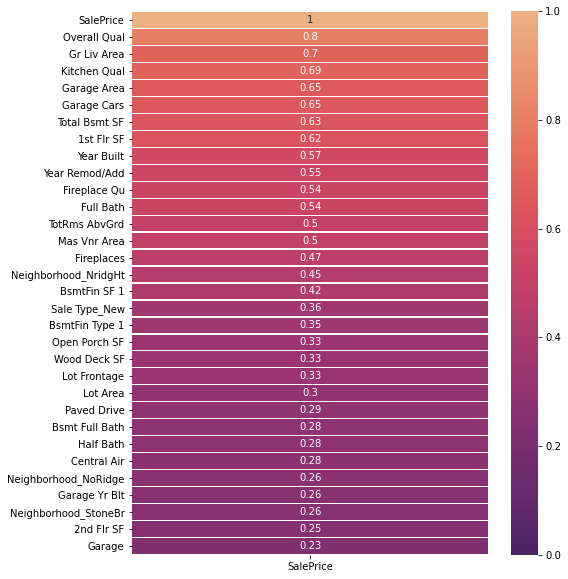

In [76]:
# Heatmap of SalePrice Correlation Matrix

plt.figure(figsize = (8,10))
sns.heatmap(data = sale_corr.sort_values(by = 'SalePrice', ascending = False),
           annot = True,
           cmap = 'flare_r',
           linewidths=0.1,
           vmin=0,
           vmax=1);

Interpretation: Overall Quality, Above Grade (ground) Living Area SF, Kitchen Quality, Garage Area, and Garage Cars had the highest correlation with price. Will definitely include these with feature selection.

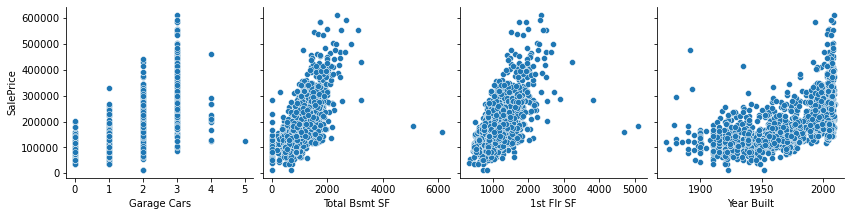

In [77]:
# Reviewing features for linear relationship with SalePrice and outliers
sns.pairplot(data = df_train,
            y_vars = ['SalePrice'],
            x_vars = ['Garage Cars', 'Total Bsmt SF','1st Flr SF','Year Built'], height = 3);

Interpretation: Looks like there may be linear relationships with all 4 variables and SalePrice. There are a few outliers in Total Bsmt SF and 1st Flr SF, as well as one outlier for a garage that fits 5 cars. Should remove these before modeling. 

In [78]:
# Dropping Total Basement SF above 4000
df_train.drop(df_train.loc[df_train['Total Bsmt SF'] > 4000].index, inplace = True)

In [79]:
# Dropping 1st Flr SF above 3700
df_train.drop(df_train.loc[df_train['1st Flr SF'] > 3700].index, inplace = True)

In [80]:
# Dropping Garage Cars for 5 or higher
df_train.drop(df_train.loc[df_train['Garage Cars'] >= 5].index, inplace = True)

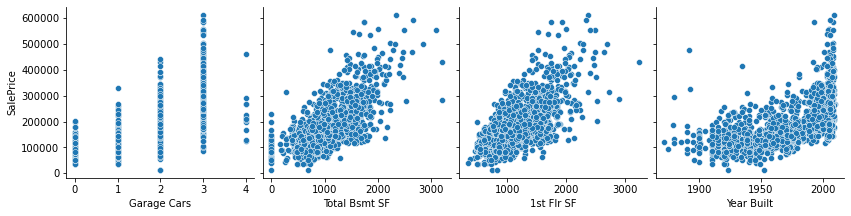

In [81]:
# Reviewing updates
sns.pairplot(data = df_train,
            y_vars = ['SalePrice'],
            x_vars = ['Garage Cars', 'Total Bsmt SF','1st Flr SF','Year Built'], height = 3);

The removal of the outliers looks better for modeling.

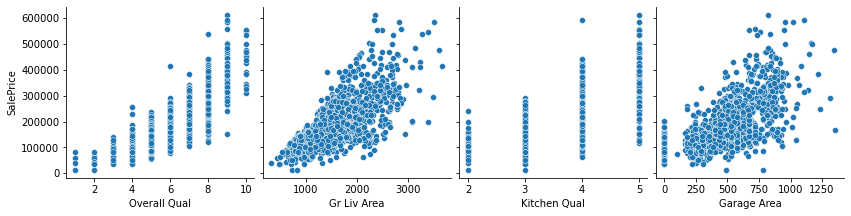

In [82]:
# Reviewing features for linear relationship with SalePrice and outliers
sns.pairplot(data = df_train,
            y_vars = ['SalePrice'],
            x_vars = ['Overall Qual','Gr Liv Area','Kitchen Qual','Garage Area'], height = 3);

Interpretation: Looks like there may be linear relationships with all 4 variables and SalePrice. No noticable outliers for these variables.

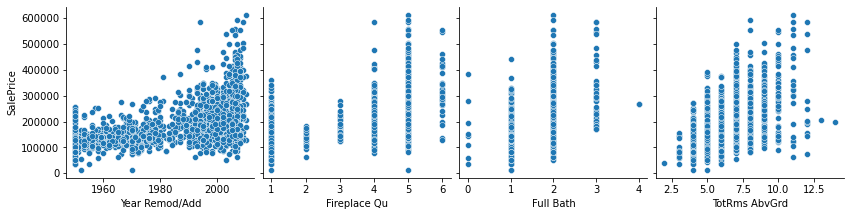

In [83]:
# Reviewing features for linear relationship with SalePrice and outliers
sns.pairplot(data = df_train,
            y_vars = ['SalePrice'],
            x_vars = ['Year Remod/Add', 'Fireplace Qu','Full Bath','TotRms AbvGrd'], height = 3);

Interpretation: Looks like there may be linear relationships with all 4 variables and SalePrice. There are appear to be a couple of outliers in Full Bath and Total Rooms Above Ground. Should remove these before modeling. 

In [84]:
# Dropping Full Bath for 4+
df_train.drop(df_train.loc[df_train['Full Bath'] >= 4].index, inplace = True)

In [85]:
# Dropping Total Rooms Above Ground for 13+
df_train.drop(df_train.loc[df_train['TotRms AbvGrd'] >= 13].index, inplace = True)

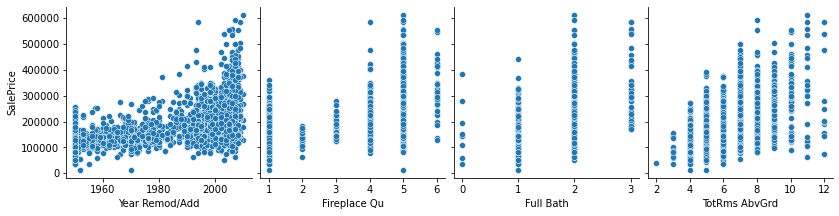

In [86]:
# Reviewing updates
sns.pairplot(data = df_train,
            y_vars = ['SalePrice'],
            x_vars = ['Year Remod/Add', 'Fireplace Qu','Full Bath','TotRms AbvGrd'], height = 3);

Looks better for modeling

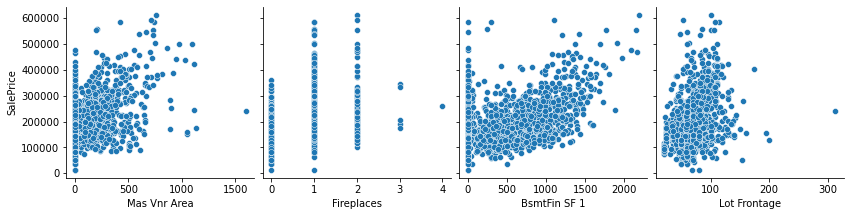

In [87]:
# Reviewing features for linear relationship with SalePrice and outliers
sns.pairplot(data = df_train,
            y_vars = ['SalePrice'],
            x_vars = ['Mas Vnr Area', 'Fireplaces','BsmtFin SF 1','Lot Frontage'], height = 3);

Interpretation: Looks like there may be linear relationships with all 4 variables and SalePrice. There are appear to be a couple of outliers in Masonry Veneer Area, Fireplaces, and Lot Frontage. Should remove these before modeling. 

In [88]:
# Dropping Masonry Veneer Area 1250+
df_train.drop(df_train.loc[df_train['Mas Vnr Area'] >= 1250].index, inplace = True)

In [89]:
# Dropping Fireplaces for 4+
df_train.drop(df_train.loc[df_train['Fireplaces'] >= 4].index, inplace = True)

In [90]:
# Dropping Lot Frontage for 250+
df_train.drop(df_train.loc[df_train['Lot Frontage'] >= 250].index, inplace = True)

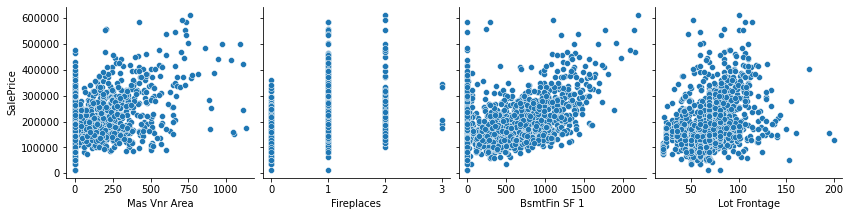

In [91]:
# Reviewing updates
sns.pairplot(data = df_train,
            y_vars = ['SalePrice'],
            x_vars = ['Mas Vnr Area', 'Fireplaces','BsmtFin SF 1','Lot Frontage'], height = 3);

Looks better for modeling.

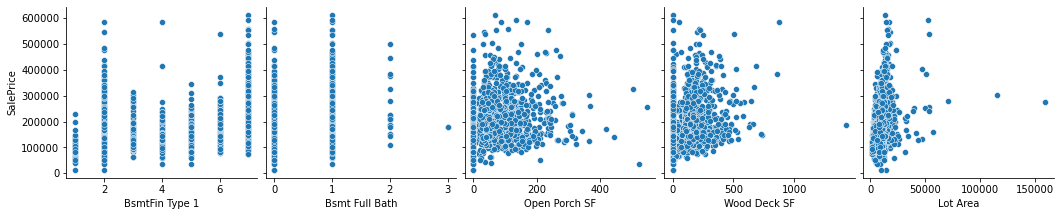

In [92]:
# Reviewing features for linear relationship with SalePrice and outliers
sns.pairplot(data = df_train,
            y_vars = ['SalePrice'],
            x_vars = ['BsmtFin Type 1','Bsmt Full Bath','Open Porch SF','Wood Deck SF','Lot Area'], height = 3);

Interpretation: Looks like there may be linear relationships with all 5 variables and SalePrice. There are appear to be a couple of outliers in Basement Full Bath, Wood Deck SF, Open Porch SF, Lot Area. Should remove these before modeling. 

In [93]:
# Dropping Basement Full Bath for 2.5+
df_train.drop(df_train.loc[df_train['Bsmt Full Bath'] >= 2.5].index, inplace = True)

In [94]:
# Dropping Wood Deck SF for 500+
df_train.drop(df_train.loc[df_train['Wood Deck SF'] >= 1200].index, inplace = True)

In [95]:
# Dropping Open Porch SF for 500+
df_train.drop(df_train.loc[df_train['Open Porch SF'] >= 500].index, inplace = True)

In [96]:
# Dropping Lot Area SF for 100000+
df_train.drop(df_train.loc[df_train['Lot Area'] >= 100000].index, inplace = True)

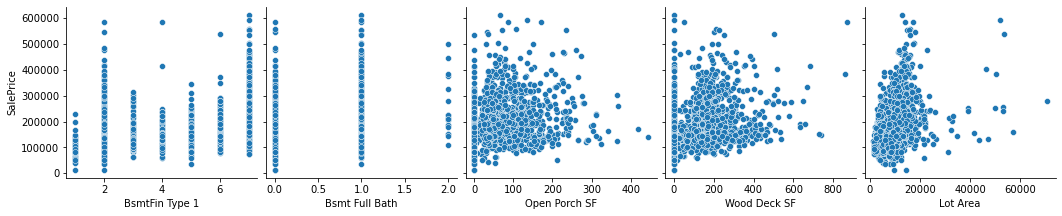

In [97]:
# Reviewing updates
sns.pairplot(data = df_train,
            y_vars = ['SalePrice'],
            x_vars = ['BsmtFin Type 1','Bsmt Full Bath','Open Porch SF','Wood Deck SF','Lot Area'], height = 3);

Looks better for modeling.

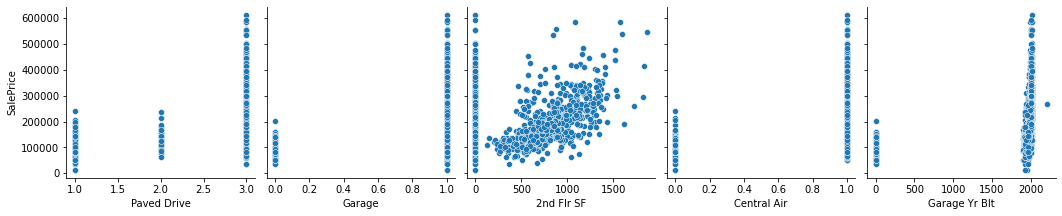

In [98]:
# Reviewing features for linear relationship with SalePrice and outliers
sns.pairplot(data = df_train,
            y_vars = ['SalePrice'],
            x_vars = ['Paved Drive','Garage','2nd Flr SF','Central Air','Garage Yr Blt'], height = 3);

Interpretation: Looks like there may be positive relationships with all 5 variables and SalePrice. Looking into outlier for Garage Yr Built.  

In [99]:
# Checking garage yr blt outlier
df_train['Garage Yr Blt'].sort_values(ascending = False).unique()

array([2207., 2010., 2009., 2008., 2007., 2006., 2005., 2004., 2003.,
       2002., 2001., 2000., 1999., 1998., 1997., 1996., 1995., 1994.,
       1993., 1992., 1991., 1990., 1989., 1988., 1987., 1986., 1985.,
       1984., 1983., 1982., 1981., 1980., 1979., 1978., 1977., 1976.,
       1975., 1974., 1973., 1972., 1971., 1970., 1969., 1968., 1967.,
       1966., 1965., 1964., 1963., 1962., 1961., 1960., 1959., 1958.,
       1957., 1956., 1955., 1954., 1953., 1952., 1951., 1950., 1949.,
       1948., 1947., 1946., 1945., 1942., 1941., 1940., 1939., 1938.,
       1937., 1936., 1935., 1934., 1933., 1932., 1931., 1930., 1929.,
       1928., 1927., 1926., 1925., 1924., 1923., 1922., 1921., 1920.,
       1919., 1918., 1917., 1916., 1915., 1914., 1910., 1900., 1896.,
       1895.,    0.])

In [100]:
# Removing garage built in 2207
df_train.drop(df_train.loc[df_train['Garage Yr Blt'] >= 2207].index, inplace = True)

In [101]:
# Checking SalePrice Correlation Matrix 
corr = df_train.corr()
sales_corr = corr[['SalePrice']]
sale_corr = sales_corr.loc[corr['SalePrice'] > .50]

In [102]:
# Checking garage yr blt for removal of outlier
df_train['Garage Yr Blt'].sort_values(ascending = False).unique()

array([2010., 2009., 2008., 2007., 2006., 2005., 2004., 2003., 2002.,
       2001., 2000., 1999., 1998., 1997., 1996., 1995., 1994., 1993.,
       1992., 1991., 1990., 1989., 1988., 1987., 1986., 1985., 1984.,
       1983., 1982., 1981., 1980., 1979., 1978., 1977., 1976., 1975.,
       1974., 1973., 1972., 1971., 1970., 1969., 1968., 1967., 1966.,
       1965., 1964., 1963., 1962., 1961., 1960., 1959., 1958., 1957.,
       1956., 1955., 1954., 1953., 1952., 1951., 1950., 1949., 1948.,
       1947., 1946., 1945., 1942., 1941., 1940., 1939., 1938., 1937.,
       1936., 1935., 1934., 1933., 1932., 1931., 1930., 1929., 1928.,
       1927., 1926., 1925., 1924., 1923., 1922., 1921., 1920., 1919.,
       1918., 1917., 1916., 1915., 1914., 1910., 1900., 1896., 1895.,
          0.])

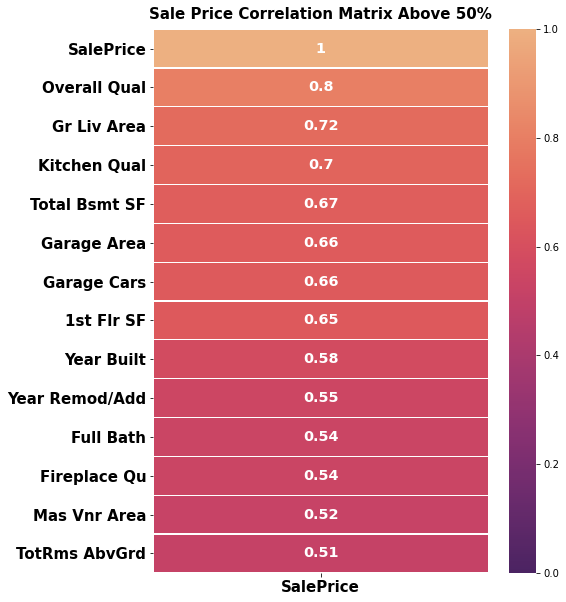

In [103]:
# Heatmap of SalePrice Correlation Matrix

annot_dict = {
    'c':'white',
    'fontsize':'x-large',
    'fontweight':'bold',
    'ha':'center'
}

plt.figure(figsize = (7.5,10))
sns.heatmap(data = sale_corr.sort_values(by = 'SalePrice', ascending = False),
           annot = True,
           linewidths=0.1,
           cmap = 'flare_r',
            annot_kws = annot_dict,
           vmin=0,
           vmax=1)

plt.xticks(size = 15, fontweight = 'bold')
plt.yticks(size = 15, fontweight = 'bold')
plt.title('Sale Price Correlation Matrix Above 50%', size = 15, pad = 10, fontweight = 'bold');
plt.savefig('./images/correlation.png',dpi=300, bbox_inches = "tight")

Interpretation: These are features that have a correlation of .5 and higher. Will be using these as independent features for modeling. 

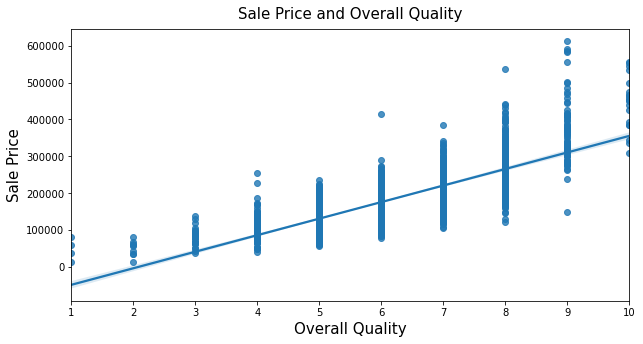

In [104]:
# Looking at top correlation feature, Overall Qual
plt.figure(figsize = (10,5))
sns.regplot(x= 'Overall Qual', y= 'SalePrice', data= df_train)
plt.title('Sale Price and Overall Quality', size = 15, pad = 10),
plt.xlabel(xlabel = 'Overall Quality', size = 15)
plt.ylabel(ylabel = 'Sale Price', size = 15);
plt.savefig('./images/scatter_overall_qual.png',dpi=300, bbox_inches = "tight")

Interpretation: Positive linear relationship between Sale Price and Overall Quality

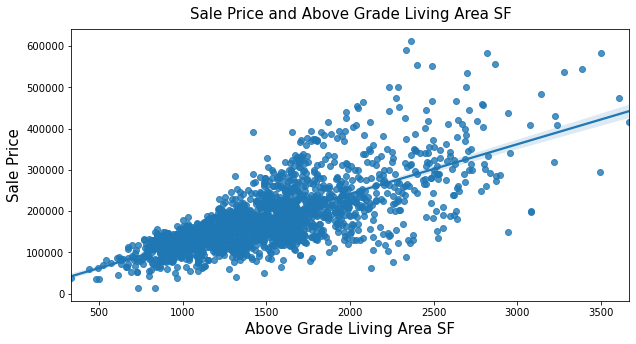

In [105]:
# Looking at top correlation feature, Gr Liv Area
plt.figure(figsize = (10,5))
sns.regplot(x= 'Gr Liv Area', y= 'SalePrice', data= df_train)
plt.title('Sale Price and Above Grade Living Area SF', size = 15, pad = 10),
plt.xlabel(xlabel = 'Above Grade Living Area SF', size = 15)
plt.ylabel(ylabel = 'Sale Price', size = 15);
plt.savefig('./images/scatter_abv_liv_area.png',dpi=300, bbox_inches = "tight")

Interpretation: Positive linear relationship between Sale Price and Above Grade Living Area SF

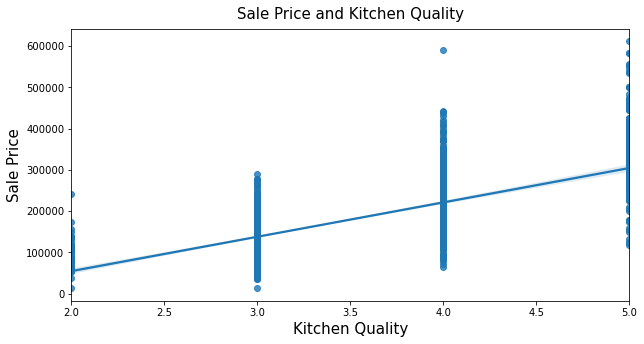

In [106]:
# Looking at top correlation feature, Kitchen Qual
plt.figure(figsize = (10,5))
sns.regplot(x= 'Kitchen Qual', y= 'SalePrice', data= df_train)
plt.title('Sale Price and Kitchen Quality', size = 15, pad = 10),
plt.xlabel(xlabel = 'Kitchen Quality', size = 15)
plt.ylabel(ylabel = 'Sale Price', size = 15);
plt.savefig('./images/kitchen_qual.png',dpi=300, bbox_inches = "tight")

Interpretation: Positive linear relationship between Sale Price and Kitchen Quality

#### Given the information collected through EDA and plotting, I believe I will successfully be able to answer my problem statement and build a successful model. 

### Preprocessing

In [107]:
# Creating feature list based on correlation matrix for 23% and higher (excluding dummy columns)
poly_features = ['2nd Flr SF','Central Air','Bsmt Full Bath','BsmtFin SF 1','1st Flr SF','Garage',
                 'Overall Qual','Year Built','Year Remod/Add','Mas Vnr Area','BsmtFin Type 1','Total Bsmt SF',
                 'Lot Area','Lot Frontage','Fireplaces','Fireplace Qu','Gr Liv Area', 'Full Bath','Half Bath',
                 'TotRms AbvGrd','Kitchen Qual','Paved Drive','Open Porch SF','Wood Deck SF','Garage Cars','Garage Area','Garage Yr Blt']

In [108]:
df_train[poly_features].isnull().sum()

2nd Flr SF        0
Central Air       0
Bsmt Full Bath    0
BsmtFin SF 1      0
1st Flr SF        0
Garage            0
Overall Qual      0
Year Built        0
Year Remod/Add    0
Mas Vnr Area      0
BsmtFin Type 1    0
Total Bsmt SF     0
Lot Area          0
Lot Frontage      0
Fireplaces        0
Fireplace Qu      0
Gr Liv Area       0
Full Bath         0
Half Bath         0
TotRms AbvGrd     0
Kitchen Qual      0
Paved Drive       0
Open Porch SF     0
Wood Deck SF      0
Garage Cars       0
Garage Area       0
Garage Yr Blt     0
dtype: int64

In [109]:
# Instantiating Polynomial Features
# Setting degree to 2 and interaction_only to True, to avoid overfitting
poly = PolynomialFeatures(degree = 2, interaction_only = True, include_bias = False)
poly

PolynomialFeatures(include_bias=False, interaction_only=True)

In [110]:
# Fit and transform independent variables for training set
X_poly = poly.fit_transform(df_train[poly_features])

In [111]:
# Tranforming independent variables for testing set
X_poly_test = poly.transform(df_test[poly_features])

In [112]:
# Getting Polynomial Feature Names
poly.get_feature_names(poly_features)[:10]

['2nd Flr SF',
 'Central Air',
 'Bsmt Full Bath',
 'BsmtFin SF 1',
 '1st Flr SF',
 'Garage',
 'Overall Qual',
 'Year Built',
 'Year Remod/Add',
 'Mas Vnr Area']

In [113]:
# Creating dataframe for train set
poly_df = pd.DataFrame(index = df_train.index, data = X_poly, columns = poly.get_feature_names(poly_features))
poly_df.head()

,2nd Flr SF,Central Air,Bsmt Full Bath,BsmtFin SF 1,1st Flr SF,Garage,Overall Qual,Year Built,Year Remod/Add,Mas Vnr Area,...,Open Porch SF Wood Deck SF,Open Porch SF Garage Cars,Open Porch SF Garage Area,Open Porch SF Garage Yr Blt,Wood Deck SF Garage Cars,Wood Deck SF Garage Area,Wood Deck SF Garage Yr Blt,Garage Cars Garage Area,Garage Cars Garage Yr Blt,Garage Area Garage Yr Blt
Id,,,,,,,,,,,,,,,,,,,,,
109,754.0,1.0,0.0,533.0,725.0,1.0,6.0,1976.0,2005.0,289.0,...,0.0,88.0,20900.0,86944.0,0.0,0.0,0.0,950.0,3952.0,938600.0
544,1209.0,1.0,1.0,637.0,913.0,1.0,7.0,1996.0,1997.0,132.0,...,0.0,148.0,41366.0,147778.0,0.0,0.0,0.0,1118.0,3994.0,1116323.0
153,0.0,1.0,1.0,731.0,1057.0,1.0,5.0,1953.0,2007.0,0.0,...,0.0,52.0,12792.0,101556.0,0.0,0.0,0.0,246.0,1953.0,480438.0
318,700.0,1.0,0.0,0.0,744.0,1.0,5.0,2006.0,2007.0,0.0,...,0.0,0.0,0.0,0.0,200.0,40000.0,200700.0,800.0,4014.0,802800.0
255,614.0,1.0,0.0,0.0,831.0,1.0,6.0,1900.0,1993.0,0.0,...,0.0,118.0,28556.0,115463.0,0.0,0.0,0.0,968.0,3914.0,947188.0


In [114]:
# Creating dataframe for test set
poly_df_test = pd.DataFrame(index = df_test.index, data = X_poly_test, columns = poly.get_feature_names(poly_features))
poly_df_test.head()

,2nd Flr SF,Central Air,Bsmt Full Bath,BsmtFin SF 1,1st Flr SF,Garage,Overall Qual,Year Built,Year Remod/Add,Mas Vnr Area,...,Open Porch SF Wood Deck SF,Open Porch SF Garage Cars,Open Porch SF Garage Area,Open Porch SF Garage Yr Blt,Wood Deck SF Garage Cars,Wood Deck SF Garage Area,Wood Deck SF Garage Yr Blt,Garage Cars Garage Area,Garage Cars Garage Yr Blt,Garage Area Garage Yr Blt
Id,,,,,,,,,,,,,,,,,,,,,
2658,1020.0,0.0,0.0,0.0,908.0,1.0,6.0,1910.0,1950.0,0.0,...,0.0,60.0,26400.0,114600.0,0.0,0.0,0.0,440.0,1910.0,840400.0
2718,0.0,1.0,0.0,0.0,1967.0,1.0,5.0,1977.0,1977.0,0.0,...,0.0,0.0,0.0,0.0,340.0,98600.0,336090.0,1160.0,3954.0,1146660.0
2414,832.0,1.0,1.0,554.0,664.0,1.0,7.0,2006.0,2006.0,0.0,...,2400.0,48.0,10224.0,48144.0,200.0,42600.0,200600.0,852.0,4012.0,854556.0
1989,0.0,1.0,0.0,0.0,968.0,1.0,5.0,1923.0,2006.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,960.0,3870.0,928800.0
625,0.0,1.0,1.0,609.0,1394.0,1.0,6.0,1963.0,1963.0,247.0,...,0.0,152.0,39064.0,149188.0,0.0,0.0,0.0,1028.0,3926.0,1008982.0


In [115]:
# Features of dummy columns
features = ['Neighborhood_Blmngtn', 'Neighborhood_Blueste', 'Neighborhood_BrDale',
       'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighborhood_CollgCr',
       'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_Gilbert',
       'Neighborhood_Greens', 'Neighborhood_GrnHill', 'Neighborhood_IDOTRR',
       'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neighborhood_NAmes',
       'Neighborhood_NPkVill', 'Neighborhood_NWAmes', 'Neighborhood_NoRidge',
       'Neighborhood_NridgHt', 'Neighborhood_OldTown', 'Neighborhood_SWISU',
       'Neighborhood_Sawyer', 'Neighborhood_SawyerW', 'Neighborhood_Somerst',
       'Neighborhood_StoneBr', 'Neighborhood_Timber', 'Neighborhood_Veenker','Condition 1_Artery', 'Condition 1_Feedr', 'Condition 1_Norm',
       'Condition 1_PosA', 'Condition 1_PosN', 'Condition 1_RRAe',
       'Condition 1_RRAn', 'Condition 1_RRNn','Sale Type_COD', 'Sale Type_CWD', 'Sale Type_Con', 'Sale Type_ConLD',
       'Sale Type_ConLI', 'Sale Type_ConLw', 'Sale Type_New', 'Sale Type_Oth',
       'Sale Type_WD ']

In [116]:
# Creating X Variable Dataframe
X = df_train[features]
X.head()

,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,...,Condition 1_RRNn,Sale Type_COD,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_WD
Id,,,,,,,,,,,,,,,,,,,,,
109,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
544,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
153,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
318,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
255,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [117]:
# Merging X Dataframe and Polynomial Feature Dataframe for training set
X = pd.merge(left = X, right = poly_df, how = 'outer', left_index = True, right_index = True)

In [118]:
# Checking new dataframe
X.shape

(2031, 422)

In [119]:
# Defining target variable
y = df_train['SalePrice']

In [120]:
# Train test split for modeling
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 321)

In [121]:
# Shape of X train and X test 
print(X_train.shape)
print(X_test.shape)

(1523, 422)
(508, 422)


### Modeling

### Baseline 

In [122]:
y_train_baseline = [y_train.mean()]*len(y_train)
y_test_baseline = [y_train.mean()]*len(y_test)

In [123]:
# Baseline RMSE for training
mean_squared_error(y_train,y_train_baseline) ** 0.5

79002.22364426145

In [124]:
# Baseline RMSE for testing
mean_squared_error(y_test, y_test_baseline) ** 0.5

79990.12427480765

The baseline model is a model with no predictors. With no predictors, we would expect there to be a Root Mean Squared Error of 79,002 on the training set and 79,990 on the testing set. The R-squared score would be 0. 

### Linear Regression

In [125]:
# Instantiating and Fitting Linear Regression Model
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [126]:
# R2 Score for Training
lr.score(X_train, y_train)

0.9628362909021038

In [127]:
# R2 Score for Testing
lr.score(X_test, y_test)

0.8911195001992106

In [128]:
# Cross Val Score
cross_val_score(LinearRegression(),X_train,y_train,cv = 20, scoring = 'r2').mean()

-1283.6681064926838

In [129]:
# Setting Predictions
train_preds = lr.predict(X_train)
test_preds = lr.predict(X_test)

In [130]:
# RMSE for Training
lr_train_rmse = mean_squared_error(y_train, train_preds)**0.5
lr_train_rmse

15229.962757831947

In [131]:
# RMSE for Testing
lr_test_rmse = mean_squared_error(y_test, test_preds)**0.5
lr_test_rmse

26382.46842462088

Linear Regression model is doing fairly well. But there appears to be a high variance and low bias because the R-squared score is higher for the training model than the testing model. The testing model has a higher RMSE than the training model. Trying Ridge with Cross Val next. 

In [132]:
# Summary of OLS Results
ols = sm.OLS(y_train, X_train).fit()
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              SalePrice   R-squared (uncentered):                   0.994
Model:                            OLS   Adj. R-squared (uncentered):              0.992
Method:                 Least Squares   F-statistic:                              444.6
Date:                Tue, 09 Nov 2021   Prob (F-statistic):                        0.00
Time:                        16:01:50   Log-Likelihood:                         -16829.
No. Observations:                1523   AIC:                                  3.449e+04
Df Residuals:                    1105   BIC:                                  3.672e+04
Df Model:                         418                                                  
Covariance Type:            nonrobust                                                  
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Neighborhood_Blmngtn           2.504e+04   2.03e+04      1.235      0.217   -1.47e+04    6.48e+04
Neighborhood_Blueste           4.056e+04   2.36e+04      1.717      0.086   -5802.654    8.69e+04
Neighborhood_BrDale            2555.6591   2.17e+04      0.118      0.906      -4e+04    4.51e+04
Neighborhood_BrkSide            2.25e+04   1.97e+04      1.143      0.253   -1.61e+04    6.11e+04
Neighborhood_ClearCr           3.903e+04      2e+04      1.951      0.051    -229.221    7.83e+04
Neighborhood_CollgCr           1.573e+04   1.93e+04      0.815      0.415   -2.21e+04    5.36e+04
Neighborhood_Crawfor           4.493e+04   1.97e+04      2.283      0.023    6322.879    8.35e+04
Neighborhood_Edwards           1.532e+04   1.95e+04      0.788      0.431   -2.28e+04    5.35e+04
Neighborhood_Gilbert           1.981e+04   1.94e+04      1.023      0.306   -1.82e+04    5.78e+04
Neighborhood_Greens            2.913e+04   2.73e+04      1.066      0.287   -2.45e+04    8.28e+04
Neighborhood_GrnHill           1.275e+05   2.51e+04      5.079      0.000    7.82e+04    1.77e+05
Neighborhood_IDOTRR            1.403e+04   1.98e+04      0.710      0.478   -2.48e+04    5.28e+04
Neighborhood_MeadowV          -6833.7745   2.04e+04     -0.335      0.738   -4.69e+04    3.32e+04
Neighborhood_Mitchel           1.866e+04   1.94e+04      0.961      0.337   -1.94e+04    5.67e+04
Neighborhood_NAmes             2.324e+04   1.94e+04      1.198      0.231   -1.48e+04    6.13e+04
Neighborhood_NPkVill           2.271e+04   2.03e+04      1.121      0.263   -1.71e+04    6.25e+04
Neighborhood_NWAmes            2.227e+04   1.95e+04      1.143      0.253   -1.59e+04    6.05e+04
Neighborhood_NoRidge           3.164e+04   1.98e+04      1.595      0.111   -7286.297    7.06e+04
Neighborhood_NridgHt           2.711e+04   1.95e+04      1.389      0.165   -1.12e+04    6.54e+04
Neighborhood_OldTown           1.625e+04   1.97e+04      0.826      0.409   -2.23e+04    5.48e+04
Neighborhood_SWISU             2.233e+04      2e+04      1.118      0.264   -1.69e+04    6.15e+04
Neighborhood_Sawyer            2.181e+04   1.95e+04      1.120      0.263   -1.64e+04       6e+04
Neighborhood_SawyerW           1.584e+04   1.95e+04      0.814      0.416   -2.23e+04     5.4e+04
Neighborhood_Somerst           2.771e+04   1.92e+04      1.441      0.150      -1e+04    6.54e+04
Neighborhood_StoneBr           5.592e+04   1.98e+04      2.828      0.005    1.71e+04    9.47e+04
Neighborhood_Timber            1.967e+04   1.95e+04      1.007      0.314   -1.87e+04     5.8e+04
Neighborhood_Veenker           2.241e+04   2.06e+04      1.086      0.278   -1.81e+04    6.29e+04
Condition 1_Artery            -2.483e+04   2

### Ridge Regression

In [133]:
# Instantiating StandardScaler
ss = StandardScaler()

In [134]:
# Fitting and Transforming X & Y
Z_train = ss.fit_transform(X_train)
Z_test = ss.transform(X_test)

In [135]:
# Checking shape
print(X_train.shape)
print(Z_train.shape)

(1523, 422)
(1523, 422)


In [136]:
# Using logspace to set a list of ridge alphas to check
ridge_alphas = np.logspace(0,50,100)

In [137]:
# Cross validate over list of ridge alphas 
ridge_cv = RidgeCV(alphas = ridge_alphas, scoring = 'r2', cv = 10)

# Fit model using best ridge alpha
ridge_cv.fit(Z_train, y_train)

RidgeCV(alphas=array([1.00000000e+00, 3.19926714e+00, 1.02353102e+01, 3.27454916e+01,
       1.04761575e+02, 3.35160265e+02, 1.07226722e+03, 3.43046929e+03,
       1.09749877e+04, 3.51119173e+04, 1.12332403e+05, 3.59381366e+05,
       1.14975700e+06, 3.67837977e+06, 1.17681195e+07, 3.76493581e+07,
       1.20450354e+08, 3.85352859e+08, 1.23284674e+09, 3.94420606e+09,
       1.26185688e+10, 4.03701726e+1...
       2.42012826e+38, 7.74263683e+38, 2.47707636e+39, 7.92482898e+39,
       2.53536449e+40, 8.11130831e+40, 2.59502421e+41, 8.30217568e+41,
       2.65608778e+42, 8.49753436e+42, 2.71858824e+43, 8.69749003e+43,
       2.78255940e+44, 8.90215085e+44, 2.84803587e+45, 9.11162756e+45,
       2.91505306e+46, 9.32603347e+46, 2.98364724e+47, 9.54548457e+47,
       3.05385551e+48, 9.77009957e+48, 3.12571585e+49, 1.00000000e+50]),
        cv=10, scoring='r2')

In [138]:
# Optimal value of alpha with ridge
ridge_cv.alpha_

104.76157527896652

In [139]:
# R2 Scores with Ridge
print(ridge_cv.score(Z_train, y_train))
print(ridge_cv.score(Z_test, y_test))

0.9426220193109176
0.9204464330389958


In [140]:
# Setting predictions
ridge_cv_train_preds = ridge_cv.predict(Z_train)
ridge_cv_test_preds = ridge_cv.predict(Z_test)

In [141]:
# Calculating ridge_cv training RMSE
ridge_cv_train_rmse = mean_squared_error(y_train, ridge_cv_train_preds) ** 0.5
ridge_cv_train_rmse

18923.956687295555

In [142]:
# Calculating ridge_cv training RMSE
ridge_cv_test_rmse = mean_squared_error(y_test, ridge_cv_test_preds) ** 0.5
ridge_cv_test_rmse

22551.22835296729

The Ridge model appears to be doing better than Linear Regression model, as the R-squared scores are closer together. The training R-squared and testing R-squared score are higher in this model. Though, then training set is performing slightly better than the testing set. The test RMSE is a little higher than the train RMSE. Trying Ridge with Gridsearch next.

#### Gridsearch with Ridge

In [143]:
# Instantiating Ridge
ridge = Ridge()

In [144]:
# Defining Ridge Parameters
ridge_params = {
    'alpha' : (np.logspace(-10,50,100))
}

In [145]:
# Gridsearch across alphas
ridge_gridsearch = GridSearchCV(ridge, param_grid = ridge_params, cv = 10)

In [146]:
# Fitting
ridge_gridsearch.fit(Z_train, y_train)

GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': array([1.00000000e-10, 4.03701726e-10, 1.62975083e-09, 6.57933225e-09,
       2.65608778e-08, 1.07226722e-07, 4.32876128e-07, 1.74752840e-06,
       7.05480231e-06, 2.84803587e-05, 1.14975700e-04, 4.64158883e-04,
       1.87381742e-03, 7.56463328e-03, 3.05385551e-02, 1.23284674e-01,
       4.97702356e-01, 2.00923300e+00, 8.11130831e+00, 3...
       1.14975700e+36, 4.64158883e+36, 1.87381742e+37, 7.56463328e+37,
       3.05385551e+38, 1.23284674e+39, 4.97702356e+39, 2.00923300e+40,
       8.11130831e+40, 3.27454916e+41, 1.32194115e+42, 5.33669923e+42,
       2.15443469e+43, 8.69749003e+43, 3.51119173e+44, 1.41747416e+45,
       5.72236766e+45, 2.31012970e+46, 9.32603347e+46, 3.76493581e+47,
       1.51991108e+48, 6.13590727e+48, 2.47707636e+49, 1.00000000e+50])})

In [147]:
# Best parameter
ridge_gridsearch.best_params_

{'alpha': 132.19411484660287}

In [148]:
# Best Score
ridge_gridsearch.best_score_

0.9115617723510168

In [149]:
# Train R-squared score
ridge_gridsearch.score(Z_train, y_train)

0.9411593119512522

In [150]:
# Test R-squared score
ridge_gridsearch.score(Z_test, y_test)

0.9205512415081049

In [151]:
# Setting predictions
ridge_g_train_pred = ridge_gridsearch.predict(Z_train)
ridge_g_test_pred = ridge_gridsearch.predict(Z_test)

In [152]:
# Train RMSE
ridge_g_train_rmse = mean_squared_error(y_train, ridge_g_train_pred)**0.5
ridge_g_train_rmse

19163.64806718681

In [153]:
# Test RMSE
ridge_g_test_rmse = mean_squared_error(y_test, ridge_g_test_pred)**0.5
ridge_g_test_rmse

22536.368310883

There wasn't a large change from the previous ridge model, but the test R-squared score went up .0001, and the test RMSE score went down about 15 pts. This is slightly a better model.

### LASSO

In [154]:
# Gridsearch with Lasso

In [155]:
# Defining parameters
lasso_params = {'alpha' : np.logspace(-1,0,100),
               'max_iter':[100000],
               'tol': [0.025]}

In [156]:
# Instantiate Lasso
lasso = Lasso()
lasso_grid = GridSearchCV(lasso, param_grid = lasso_params, cv = 5)

In [157]:
# Fitting
lasso_grid.fit(Z_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': array([0.1       , 0.1023531 , 0.10476158, 0.10722672, 0.10974988,
       0.1123324 , 0.1149757 , 0.1176812 , 0.12045035, 0.12328467,
       0.12618569, 0.12915497, 0.13219411, 0.13530478, 0.13848864,
       0.14174742, 0.14508288, 0.14849683, 0.15199111, 0.15556761,
       0.15922828, 0.16297508, 0.16681005, 0.17073526, 0.17475284,
       0.17886495, 0.18307383, 0...
       0.5094138 , 0.52140083, 0.53366992, 0.54622772, 0.55908102,
       0.57223677, 0.58570208, 0.59948425, 0.61359073, 0.62802914,
       0.64280731, 0.65793322, 0.67341507, 0.68926121, 0.70548023,
       0.7220809 , 0.7390722 , 0.75646333, 0.77426368, 0.7924829 ,
       0.81113083, 0.83021757, 0.84975344, 0.869749  , 0.89021509,
       0.91116276, 0.93260335, 0.95454846, 0.97700996, 1.        ]),
                         'max_iter': [100000], 'tol': [0.025]})

In [158]:
# Lasso best score
lasso_grid.best_score_

0.8930915151454043

In [159]:
# Lasso best estimator
lasso_grid.best_estimator_

Lasso(max_iter=100000, tol=0.025)

In [160]:
# Lasso best param
lasso_grid.best_params_

{'alpha': 1.0, 'max_iter': 100000, 'tol': 0.025}

In [161]:
# R-squared scores
print(f'Train Score: {lasso_grid.score(Z_train, y_train)}')
print(f'Test Score: {lasso_grid.score(Z_test, y_test)}')

Train Score: 0.9498773704157509
Test Score: 0.9106537687827285


In [162]:
# Setting up predictions
lasso_train_pred = lasso_grid.predict(Z_train)
lasso_test_pred = lasso_grid.predict(Z_test)

In [163]:
# Train RMSE
lasso_train_rmse = mean_squared_error(y_train, lasso_train_pred)** 0.5
lasso_train_rmse

17687.084026400797

In [164]:
# Test RMSE
lasso_test_rmse = mean_squared_error(y_test, lasso_test_pred)** 0.5
lasso_test_rmse

23898.931975802916

In [165]:
# R-squared Scores and RMSE
print(" OLS ".center(18, "="))
print(f'Train Score: {lr.score(X_train, y_train)}')
print(f'Test Score: {lr.score(X_test, y_test)}')
print(f'Train RMSE: {lr_train_rmse}')
print(f'Test RMSE: {lr_test_rmse}')
print()
print(" Ridge CV ".center(18, "="))
print(f'Train Score: {ridge_cv.score(Z_train, y_train)}')
print(f'Test Score: {ridge_cv.score(Z_test, y_test)}')
print(f'Train RMSE: {ridge_cv_train_rmse}')
print(f'Test RMSE: {ridge_cv_test_rmse}')
print()
print(" Ridge Grid".center(18, "="))
print(f'Train Score: {ridge_gridsearch.score(Z_train, y_train)}')
print(f'Test Score: {ridge_gridsearch.score(Z_test, y_test)}')
print(f'Train RMSE: {ridge_g_train_rmse}')
print(f'Test RMSE: {ridge_g_test_rmse}')
print()
print(" Lasso Grid".center(18, "="))
print(f'Train Score: {lasso_grid.score(Z_train, y_train)}')
print(f'Test Score: {lasso_grid.score(Z_test, y_test)}')
print(f'Train RMSE: {lasso_train_rmse}')
print(f'Test RMSE: {lasso_test_rmse}')


====== OLS =======
Train Score: 0.9628362909021038
Test Score: 0.8911195001992106
Train RMSE: 15229.962757831947
Test RMSE: 26382.46842462088

==== Ridge CV ====
Train Score: 0.9426220193109176
Test Score: 0.9204464330389958
Train RMSE: 18923.956687295555
Test RMSE: 22551.22835296729

=== Ridge Grid====
Train Score: 0.9411593119512522
Test Score: 0.9205512415081049
Train RMSE: 19163.64806718681
Test RMSE: 22536.368310883

=== Lasso Grid====
Train Score: 0.9498773704157509
Test Score: 0.9106537687827285
Train RMSE: 17687.084026400797
Test RMSE: 23898.931975802916


**The best model is the Ridge Gridscore** <br>
=== Ridge Grid==== <br>
Train Score: 0.9411 <br>
Test Score: 0.92055 <br>
Train RMSE: 19163.64 <br>
Test RMSE: 22536.36 <br>

This model predicts 92% of the variance in the test set Sale Price compared to a model with no predictors. While the model could be off by potentially \\$22,536, it is over \$57,400 lower than the baseline model.

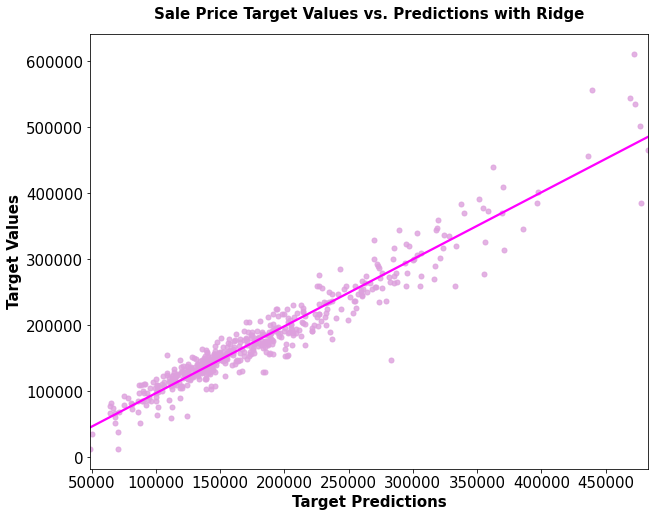

In [166]:
# Regression plot 
plt.figure(figsize = (10,8))
sns.regplot(x = ridge_g_test_pred, y = y_test, ci=None, 
            color = 'plum',
            scatter_kws = {'s': 25}, 
            line_kws = {'color': 'magenta'})
plt.xlabel('Target Predictions', size = 15, fontweight = 'bold')
plt.xticks(size = 15)
plt.ylabel('Target Values', size = 15, fontweight = 'bold')
plt.yticks(size = 15)
plt.title('Sale Price Target Values vs. Predictions with Ridge', size = 15, pad = 15, fontweight = 'bold');
plt.savefig('./images/scatter.png',dpi=300, bbox_inches = "tight")

There is a positive linear relationship between the Target Values and Target Predictions of Sale Price with the Ridge model 

In [167]:
# Calculating Residuals
test_resids = y_test - ridge_g_test_pred 
train_resids = y_train - ridge_g_train_pred

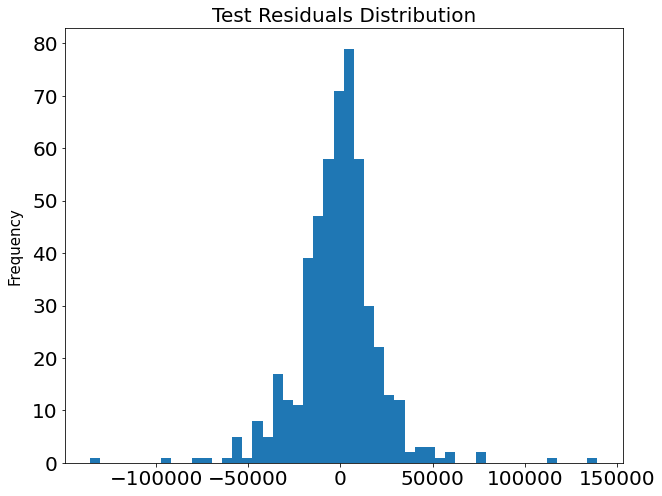

In [168]:
# Residual Distribution for Test
plt.figure(figsize = (10,8))
plt.title('Test Residuals Distribution', size = 20)
plt.hist(test_resids, bins = 50)
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.ylabel('Frequency', size = 15, labelpad = 10)
plt.savefig('./images/test_resids.png',dpi=300, bbox_inches = "tight");

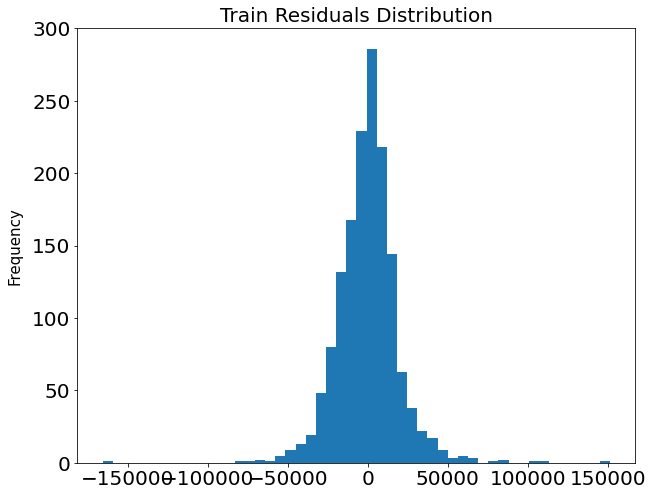

In [169]:
# Residual Distribution for Train
plt.figure(figsize = (10,8))
plt.title('Train Residuals Distribution', size = 20)
plt.hist(train_resids, bins = 50)
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.ylabel('Frequency', size = 15, labelpad = 10)
plt.savefig('./images/train_resids.png',dpi=300, bbox_inches = "tight");

While these are obviously not perfectly distributed, they are pretty close to normal distribution with a slight skew and outliers. This indicates the model is on the right track.

In [170]:
# Coefficients
ridge_coef = pd.DataFrame({
    'column': X.columns,
    'coef': ridge_gridsearch.best_estimator_.coef_
}).sort_values(by = 'coef',ascending = True)
ridge_coef.head(20)

,column,coef
317,Lot Area Lot Frontage,-2447.040245
397,TotRms AbvGrd Wood Deck SF,-2134.405129
321,Lot Area Full Bath,-2133.323557
35,Sale Type_COD,-2089.941132
322,Lot Area Half Bath,-1970.249841
273,Mas Vnr Area Fireplaces,-1860.543013
293,BsmtFin Type 1 Half Bath,-1814.186956
12,Neighborhood_MeadowV,-1803.441038
129,Bsmt Full Bath BsmtFin Type 1,-1729.608228
297,BsmtFin Type 1 Open Porch SF,-1721.069778


In [171]:
ridge_coef_plot = ridge_coef.loc[(ridge_coef['coef'] > 3700) | (ridge_coef['coef']< -1950)]
ridge_coef_plot

,column,coef
317,Lot Area Lot Frontage,-2447.040245
397,TotRms AbvGrd Wood Deck SF,-2134.405129
321,Lot Area Full Bath,-2133.323557
35,Sale Type_COD,-2089.941132
322,Lot Area Half Bath,-1970.249841
232,Year Built Year Remod/Add,3712.973484
170,1st Flr SF Overall Qual,4117.469859
217,Overall Qual Lot Area,4269.797715
24,Neighborhood_StoneBr,4351.801614
216,Overall Qual Total Bsmt SF,4756.366949


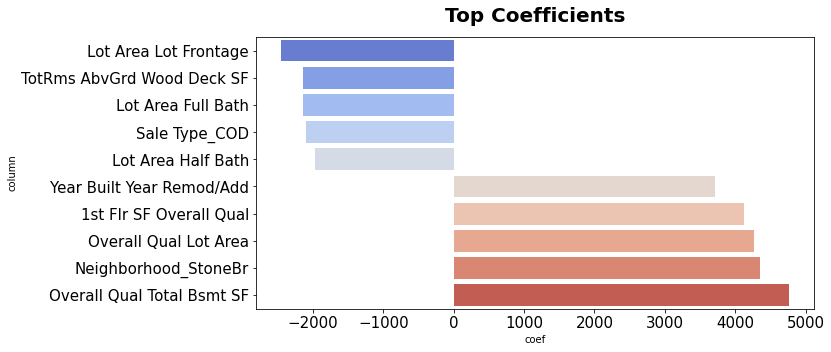

In [172]:
plt.figure(figsize = (10,5))
sns.barplot(data = ridge_coef_plot, x = 'coef', y = 'column', palette = 'coolwarm')
plt.title('Top Coefficients', size = 20, pad = 15, fontweight = 'bold')
plt.yticks(size = 15)
plt.xticks(size = 15);
plt.savefig('./images/top_coefs.png',dpi=300, bbox_inches = "tight")

**Top Positive Coefficients** <br>
For every 1 unit increase in Overall Quality and Total Basement Square Feet, I would expect there to be an increase in the value of a home by about \$4,750, all else being constant.

I would expect that the value of a house will increase by about \$4,350 if it is located in the neighborhood Stone Brook, all else being constant.

**Top Negative Coefficients** <br>
For every 1 unit increase in Lot Area and Lot Frontage, I would expect there to be a decrease in the value of a home by about \$2,450, all else being constant

For every 1 unit increase in Total Rooms Above Ground and Wood Deck Square Feet, I would expect there to be a decrease in the value of a home by about $2,130, all else being constant. 


### Conclusions and Recommendations

#### How This Model Could Be Used

**Prediction** <br>
- My company can use this model to predict housing prices in areas such as Ames, Iowa. Though, we should test it in other markets to see if it is as successful before using it. 
- We could potentially sell this model to online real estate companies, such as Zillow, Trulia, and Realtor.com, so that they can improve their housing pricing predictions 
    - This could help potential homebuyers estimate what they would need to spend to get the house of their dreams
    - This could also help current owners evaluate their house value, should they choose to sell. 
    
**Inference** <br>
- My company could sell this model to housing developers who can use this model to decide where to invest upgrades and features when they build new houses
- Since Ames is a college town, and there is a large portion of houses rented, my company could sell this model to rental owners where it can then be used to charge for damage to high value features and ensure they maintain the value of the properties they own. 

#### Best Model

The Ridge Regression model was the best model for predicting pricing and reducing error. The model predicted 92% of the testing housing sale prices with a 22,536 RMSE. 

#### Recommendations

Before putting this model to use, I would recommend the following in order to improve the model: 
- Try other models and regularization methods
- Reevaluate the features used 
- Gather more current data 
- Try using the model in other housing markets

In [173]:
# Saving dataframes
df_train.to_csv('./datasets/df_train.csv')
df_test.to_csv('./datasets/df_test.csv')